In [2]:
!pip install yfinance

In [3]:
import yfinance as yf
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
go = yf.download('GOOGL',
                 start = '2020-01-01',
                 end = '2022-12-30',
                 progress=False)
df = go[['Adj Close','Open','Close','High','Low']].round(3)
df

,Adj Close,Open,Close,High,Low
Date,,,,,
2020-01-02,68.356,67.421,68.434,68.434,67.325
2020-01-03,67.998,67.400,68.076,68.688,67.366
2020-01-06,69.810,67.581,69.891,69.916,67.550
2020-01-07,69.676,70.023,69.756,70.175,69.578
2020-01-08,70.171,69.741,70.252,70.592,69.632
...,...,...,...,...,...
2022-12-22,87.659,88.160,87.760,88.540,86.320
2022-12-23,89.128,87.110,89.230,89.550,87.070
2022-12-27,87.290,88.800,87.390,88.940,87.010


<Axes: xlabel='Date'>

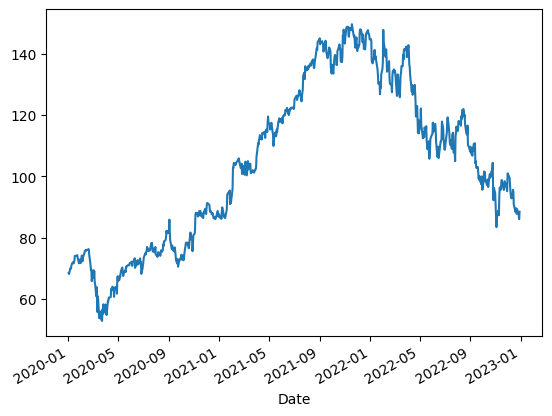

In [5]:
df.Close.plot()

In [6]:
df[:'2020'].Close.values.reshape(-1,1)

array([[68.434],
       [68.076],
       [69.891],
       [69.756],
       [70.252],
       [70.99 ],
       [71.448],
       [72.002],
       [71.53 ],
       [71.96 ],
       [72.508],
       [73.976],
       [74.113],
       [74.193],
       [74.234],
       [73.309],
       [71.587],
       [72.525],
       [72.835],
       [72.713],
       [71.639],
       [74.13 ],
       [72.271],
       [72.302],
       [73.799],
       [73.955],
       [75.433],
       [75.503],
       [75.932],
       [75.67 ],
       [75.937],
       [75.972],
       [76.243],
       [75.85 ],
       [74.173],
       [70.993],
       [69.316],
       [69.523],
       [65.747],
       [66.963],
       [69.316],
       [66.886],
       [69.08 ],
       [65.738],
       [64.787],
       [60.79 ],
       [63.758],
       [60.545],
       [55.577],
       [60.714],
       [53.65 ],
       [55.903],
       [54.56 ],
       [55.583],
       [53.41 ],
       [52.707],
       [56.5  ],
       [55.081],
       [58.146

In [7]:
df[:'2021'].Close.values.reshape(-1,1).shape

(505, 1)

In [8]:
def ts_data(df, X_steps, y_steps):
  train_df = df[:"2020"].Close.values.reshape(-1, 1)
  test_df = df["2021":].Close.values.reshape(-1, 1)

  sc = MinMaxScaler(feature_range=(0, 1))
  train_df_scaled = sc.fit_transform(train_df)

  X_train = []
  y_train = []
  for i in range(X_steps, len(train_df_scaled)-y_steps+1):
    X_train.append(train_df_scaled[i-X_steps:i, 0])
    y_train.append(train_df_scaled[i:i+y_steps, 0])
  X_train = np.array(X_train)
  y_train = np.array(y_train)

  X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

  X = df.Close.values
  X = X[len(X)-len(test_df)-X_steps:]
  X = X.reshape(-1, 1)
  X = sc.transform(X)

  X_test = []
  y_test = []
  for i in range(X_steps, len(test_df)+X_steps-y_steps+1):
    X_test.append(X[i-X_steps:i, 0])
    y_test.append(X[i:i+y_steps, 0])

  X_test = np.array(X_test)
  X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
  y_test = np.array(y_test)

  return X_train, y_train, X_test, y_test, sc

In [9]:
df[:"2020"].Close.values.reshape(-1, 1).shape

(253, 1)

In [10]:
X_train, y_train, X_test, y_test, sc = ts_data(df, 6, 2)

In [11]:
y_test.shape


(501, 2)

In [12]:
X_test.shape


(501, 6, 1)

In [13]:
y_train.shape


(246, 2)

In [14]:
X_train.shape

(246, 6, 1)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [28]:
simple_rnn_model = Sequential([
                               SimpleRNN(50, return_sequences=True),
                               SimpleRNN(50),
                               Dense(2)
                              ])

In [29]:
simple_rnn_model.compile(optimizer="adam", loss="mean_absolute_error")

In [30]:
history_rnn = simple_rnn_model.fit(X_train, y_train, epochs=100, validation_split=0.20)

Epoch 1/100
7/7 [==============================] - 3s 74ms/step - loss: 0.2094 - val_loss: 0.4159
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 0.1137 - val_loss: 0.1601
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0766 - val_loss: 0.2187
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0600 - val_loss: 0.1918
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0602 - val_loss: 0.2153
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0671 - val_loss: 0.1348
Epoch 7/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0561 - val_loss: 0.1178
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0527 - val_loss: 0.1177
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0521 - val_loss: 0.1648
Epoch 10/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0694 - val_loss: 0.1088
Epoch 11/100
7/7 [=

In [31]:
simple_rnn_pred = simple_rnn_model.predict(X_test)
simple_rnn_pred.shape

16/16 [==============================] - 0s 3ms/step


(501, 2)

In [32]:
def prediction_plot(predictions):
  fig, ax = plt.subplots()
  ax.plot(df["2021":].index[:len(y_test)],
          sc.inverse_transform(y_test[:, 0].reshape(-1, 1)), label="Real")
  ax.plot(df["2021":].index[:len(y_test)],
          sc.inverse_transform(predictions[:, 0].reshape(-1, 1)), label="Prediction")

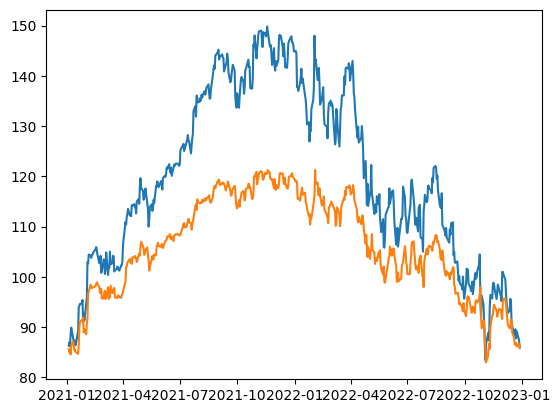

In [33]:
prediction_plot(simple_rnn_pred)

In [34]:
from keras.layers import LSTM

In [35]:
lstm = Sequential([
                    LSTM(50, return_sequences=True),
                    LSTM(50),
                    Dense(2)
                  ])

In [36]:
lstm.compile(optimizer="adam", loss="mean_absolute_error")

In [37]:
history_lstm = lstm.fit(X_train, y_train, epochs=100, validation_split=0.20)

Epoch 1/100
7/7 [==============================] - 7s 176ms/step - loss: 0.4164 - val_loss: 0.6247
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 0.2357 - val_loss: 0.2305
Epoch 3/100
7/7 [==============================] - 0s 28ms/step - loss: 0.0982 - val_loss: 0.0453
Epoch 4/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0768 - val_loss: 0.2125
Epoch 5/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0785 - val_loss: 0.1251
Epoch 6/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0626 - val_loss: 0.0924
Epoch 7/100
7/7 [==============================] - 0s 28ms/step - loss: 0.0611 - val_loss: 0.1159
Epoch 8/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0588 - val_loss: 0.0840
Epoch 9/100
7/7 [==============================] - 0s 25ms/step - loss: 0.0562 - val_loss: 0.0728
Epoch 10/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0551 - val_loss: 0.0582
Epoch 11/100
7/7 [

16/16 [==============================] - 1s 4ms/step


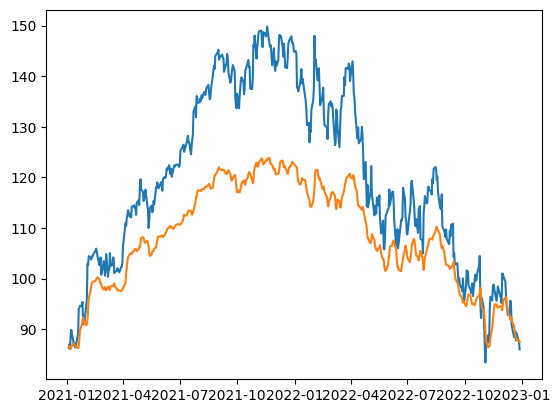

In [38]:
prediction_plot(lstm.predict(X_test))

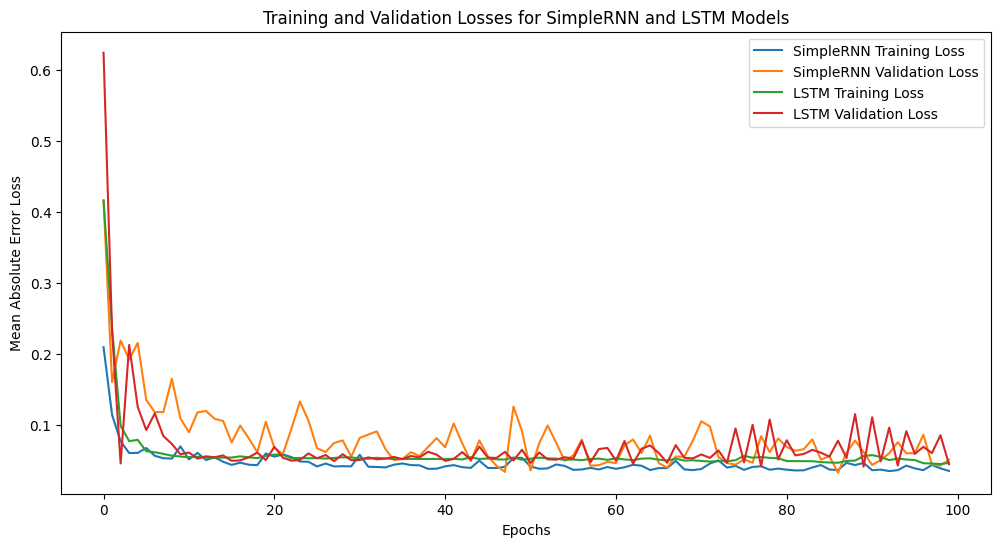

In [47]:
plt.figure(figsize=(12, 6))
# SimpleRNN losses
plt.plot(history_rnn.history['loss'], label='SimpleRNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='SimpleRNN Validation Loss')
# LSTM losses
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.title('Training and Validation Losses for SimpleRNN and LSTM Models')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error Loss')
plt.legend()
plt.show()

In [48]:
from keras.layers import GRU, Dense

In [49]:
gru_model = Sequential([
    GRU(50, return_sequences=True),
    GRU(50),
    Dense(2)
])

In [50]:
gru_model.compile(optimizer="adam", loss="mean_absolute_error")
history_gru = gru_model.fit(X_train, y_train, epochs=100, validation_split=0.20)

Epoch 1/100
7/7 [==============================] - 6s 173ms/step - loss: 0.2950 - val_loss: 0.2646
Epoch 2/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0959 - val_loss: 0.0857
Epoch 3/100
7/7 [==============================] - 0s 30ms/step - loss: 0.0790 - val_loss: 0.1637
Epoch 4/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0638 - val_loss: 0.1170
Epoch 5/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0529 - val_loss: 0.0869
Epoch 6/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0529 - val_loss: 0.0840
Epoch 7/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0487 - val_loss: 0.0751
Epoch 8/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0473 - val_loss: 0.0651
Epoch 9/100
7/7 [==============================] - 0s 26ms/step - loss: 0.0480 - val_loss: 0.0538
Epoch 10/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0454 - val_loss: 0.0499
Epoch 11/100
7/7 [

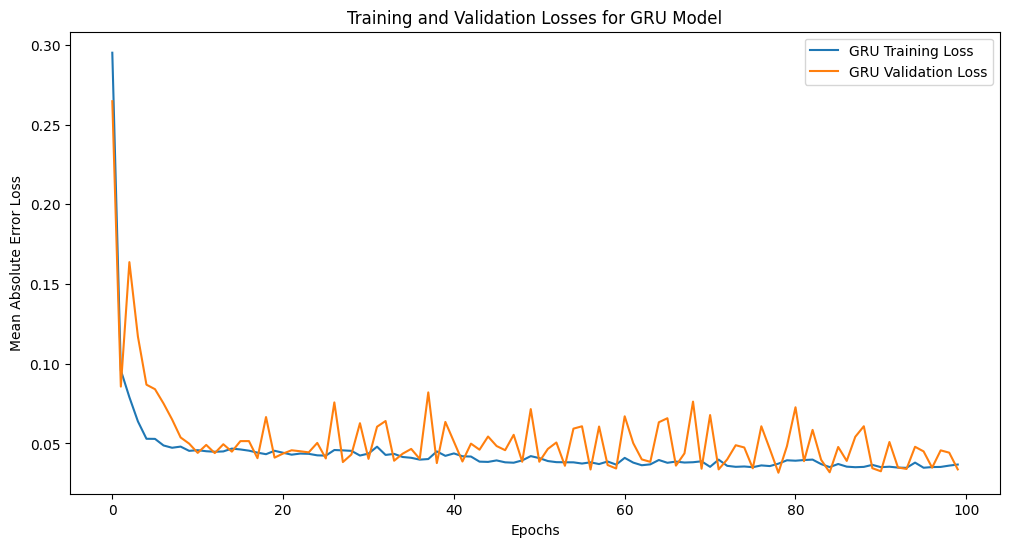

In [51]:
plt.figure(figsize=(12, 6))

# GRU losses
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')

plt.title('Training and Validation Losses for GRU Model')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error Loss')
plt.legend()
plt.show()

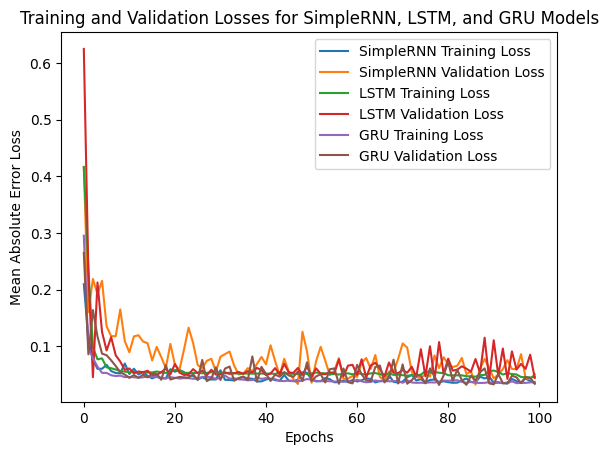

In [53]:
# SimpleRNN losses
plt.plot(history_rnn.history['loss'], label='SimpleRNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='SimpleRNN Validation Loss')

# LSTM losses
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')

# GRU losses
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.title('Training and Validation Losses for SimpleRNN, LSTM, and GRU Models')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error Loss')
plt.legend()
plt.show()

In [54]:
from keras.layers import concatenate

In [55]:
combined_model = Sequential([
    LSTM(50, return_sequences=True),
    GRU(50, return_sequences=False),
    Dense(2)
])

In [56]:
combined_model.compile(optimizer="adam", loss="mean_absolute_error")
history_combined = combined_model.fit(X_train, y_train, epochs=100, validation_split=0.20)

Epoch 1/100
7/7 [==============================] - 6s 168ms/step - loss: 0.3841 - val_loss: 0.5369
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 0.1601 - val_loss: 0.0908
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 0.1160 - val_loss: 0.1305
Epoch 4/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0741 - val_loss: 0.1905
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0680 - val_loss: 0.1253
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0624 - val_loss: 0.1302
Epoch 7/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0599 - val_loss: 0.0939
Epoch 8/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0586 - val_loss: 0.0927
Epoch 9/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0545 - val_loss: 0.0645
Epoch 10/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0541 - val_loss: 0.1002
Epoch 11/100
7/7 [

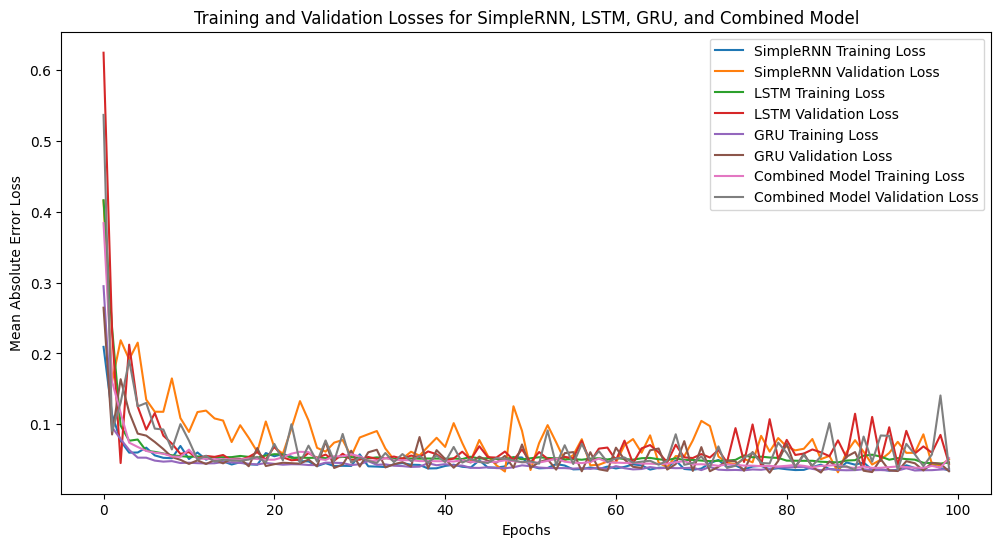

In [58]:
plt.figure(figsize=(12, 6))
# SimpleRNN losses
plt.plot(history_rnn.history['loss'], label='SimpleRNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='SimpleRNN Validation Loss')

# LSTM losses
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')

# GRU losses
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')

# Combined Model losses
plt.plot(history_combined.history['loss'], label='Combined Model Training Loss')
plt.plot(history_combined.history['val_loss'], label='Combined Model Validation Loss')

plt.title('Training and Validation Losses for SimpleRNN, LSTM, GRU, and Combined Model')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error Loss')
plt.legend()
plt.show()

In [59]:
def create_and_train_model(model_type, X_train, y_train, X_val, y_val, epochs=100):
    model = Sequential()
    if model_type == 'simple_rnn':
        model.add(SimpleRNN(50, return_sequences=True))
        model.add(SimpleRNN(50))
    elif model_type == 'lstm':
        model.add(LSTM(50, return_sequences=True))
        model.add(LSTM(50))
    elif model_type == 'gru':
        model.add(GRU(50, return_sequences=True))
        model.add(GRU(50))
    elif model_type == 'combined':
        model.add(LSTM(50, return_sequences=True))
        model.add(GRU(50))
    model.add(Dense(2))
    model.compile(optimizer='adam', loss='mean_absolute_error')
    history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.20, verbose=0)
    return model, history


In [61]:
simple_rnn_model, history_rnn = create_and_train_model('simple_rnn', X_train, y_train, X_test, y_test)
lstm_model, history_lstm = create_and_train_model('lstm', X_train, y_train, X_test, y_test)
gru_model, history_gru = create_and_train_model('gru', X_train, y_train, X_test, y_test)
combined_model, history_combined = create_and_train_model('combined', X_train, y_train, X_test, y_test)


In [63]:
simple_rnn_pred = simple_rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)
gru_pred = gru_model.predict(X_test)
combined_pred = combined_model.predict(X_test)

16/16 [==============================] - 1s 3ms/step


In [64]:
def plot_all_models(y_test, simple_rnn_pred, lstm_pred, gru_pred, combined_pred, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df["2021":].index[:len(y_test)], sc.inverse_transform(y_test[:, 0].reshape(-1, 1)), label="Real Data")
    plt.plot(df["2021":].index[:len(y_test)], sc.inverse_transform(simple_rnn_pred[:, 0].reshape(-1, 1)), label="SimpleRNN Prediction")
    plt.plot(df["2021":].index[:len(y_test)], sc.inverse_transform(lstm_pred[:, 0].reshape(-1, 1)), label="LSTM Prediction")
    plt.plot(df["2021":].index[:len(y_test)], sc.inverse_transform(gru_pred[:, 0].reshape(-1, 1)), label="GRU Prediction")
    plt.plot(df["2021":].index[:len(y_test)], sc.inverse_transform(combined_pred[:, 0].reshape(-1, 1)), label="Combined Model Prediction")
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

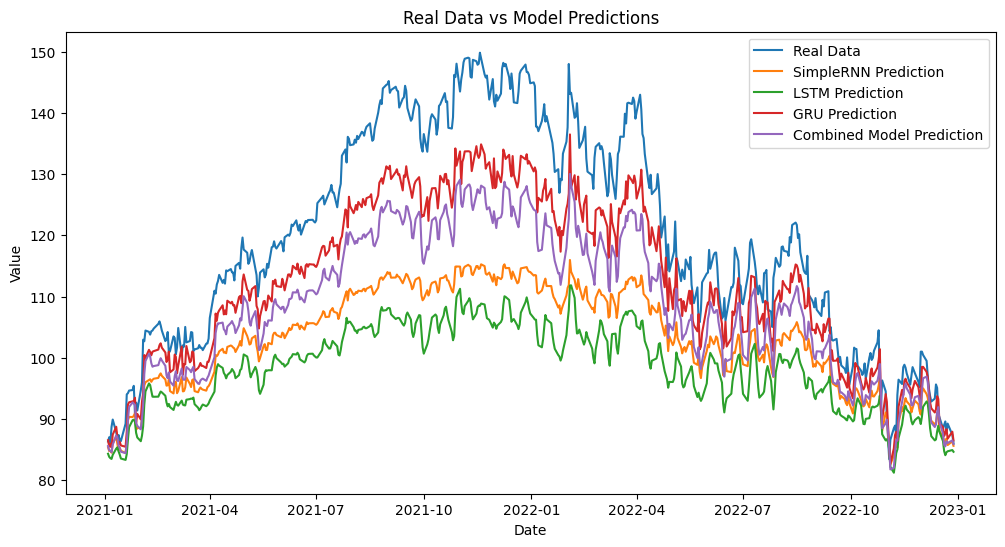

In [65]:
plot_all_models(y_test, simple_rnn_pred, lstm_pred, gru_pred, combined_pred, 'Real Data vs Model Predictions')


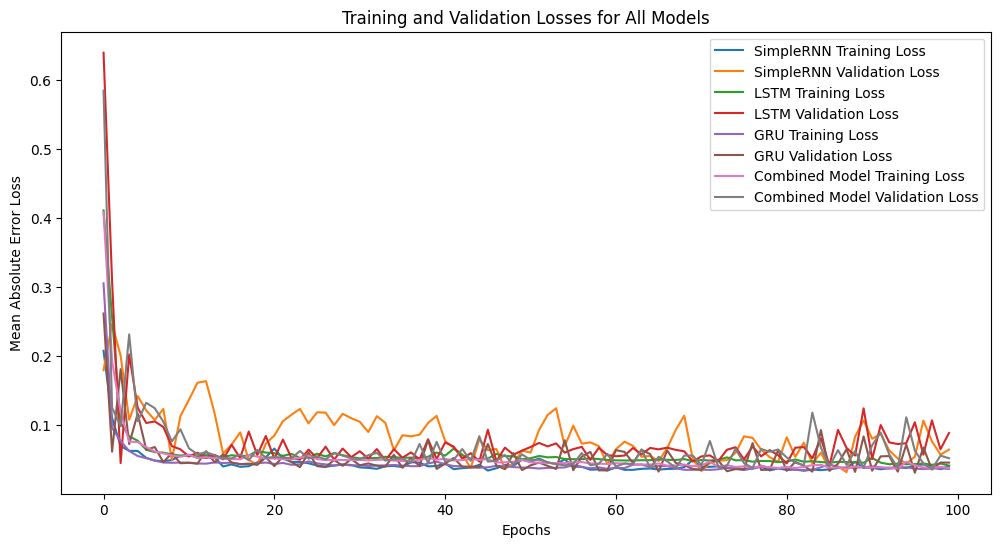

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(history_rnn.history['loss'], label='SimpleRNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='SimpleRNN Validation Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.plot(history_combined.history['loss'], label='Combined Model Training Loss')
plt.plot(history_combined.history['val_loss'], label='Combined Model Validation Loss')
plt.title('Training and Validation Losses for All Models')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error Loss')
plt.legend()
plt.show()